# Data preprocessing and exploration

### GDrive mount

Mounting procedure for google drive.
Download the Kaggle dataset and store it in the google drive. As the size of the data is large the colab notebook and drive disk isn't in sync. 

In [1]:
from google.colab import drive
drive.mount("/content/drive", force_remount=True)

ModuleNotFoundError: No module named 'google.colab'

In [ ]:
# %cd drive/My Drive/plant_disease
# !git clone https://github.com/spMohanty/PlantVillage-Dataset/

In [90]:
%cd /Users/manik/OneDrive/Desktop/plant/crop-recommendation-and-plant-disease-detection/Plant-Disease-Detection
!ls
# !unzip -q new-plant-diseases-dataset.zip -d datastore
# drive.flush_and_unmount()

c:\Users\manik\OneDrive\Desktop\plant\crop-recommendation-and-plant-disease-detection\Plant-Disease-Detection


'ls' is not recognized as an internal or external command,
operable program or batch file.


In [93]:
import os
import pandas as pd
import shutil
import matplotlib.pyplot as plt
import tensorflow as tf

In [91]:
data_dir = '/Users/manik/OneDrive/Desktop/plant/crop-recommendation-and-plant-disease-detection/Plant-Disease-Detection'
train_dir = data_dir + '/test_images'
valid_dir = data_dir + '/valid'

### Exploring the number of plants, diseases and each plant/disease image counts

In [92]:
# Store all the train_dir sub directory names in folders list
folders = os.listdir(train_dir)
print(folders)

['dir_1', 'dir_2']


In [94]:
# Count the number of unique plants, number of diseases and total classes

total_class = len(folders)

plants = []
total_disease = 0

for dir_name in folders:
  print(dir_name.split('_')[0])
  if dir_name.split('_')[0] not in plants:
    plants.append(dir_name.split('_')[0])
  if dir_name.split('_')[1] != 'healthy':
    total_disease += 1
  
print("Total classes available: ", total_class)
print("Number of unique plants: ", len(plants))
print("Total number of diseases: ", total_disease)

dir
dir
Total classes available:  2
Number of unique plants:  1
Total number of diseases:  2


In [95]:
# Display per class image count

map = {}
for dir_name in folders:
  map[dir_name] = len(os.listdir(os.path.join(train_dir, dir_name)))

images_per_class = pd.DataFrame(map.values(), index = map.keys(), columns=["Number of Images"])
images_per_class

,Number of Images
dir_1,42
dir_2,42


### Total images available for training

In [96]:
n_train = 0
for val in map.values():
  n_train += val
print("Total available images for training: ", n_train)

Total available images for training:  84


## Data preparation

In [98]:
train_arr = tf.keras.preprocessing.image_dataset_from_directory(
    train_dir,
    labels="inferred"
)
valid_arr = tf.keras.preprocessing.image_dataset_from_directory(
    valid_dir,
    labels="inferred"
)

Found 84 files belonging to 2 classes.
Found 84 files belonging to 2 classes.


Display some random images along with their classes

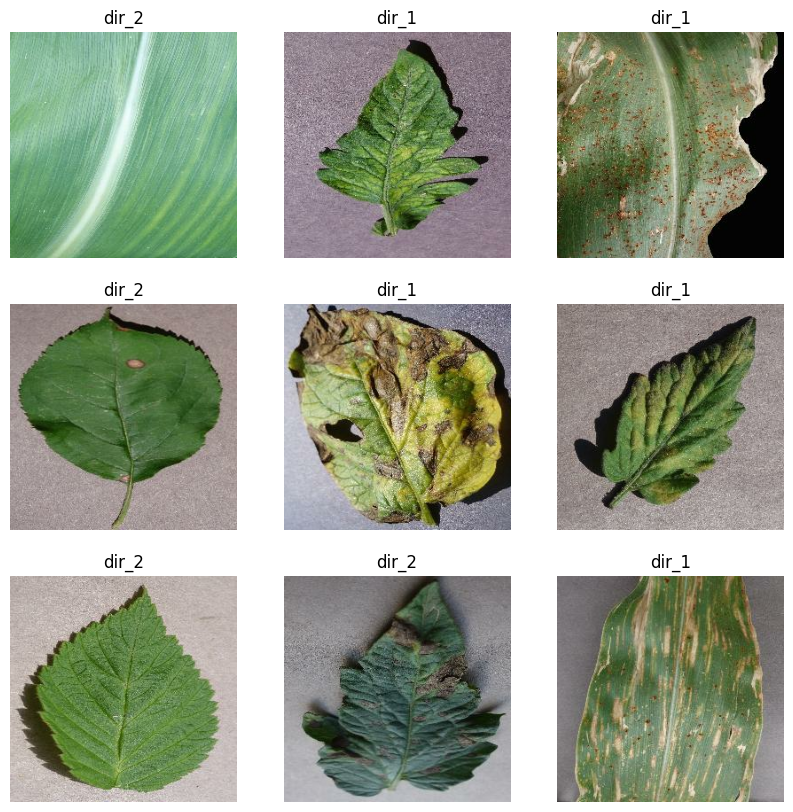

In [99]:
class_name = train_arr.class_names

plt.figure(figsize=(10, 10))
for images, labels in train_arr.take(1):
  for i in range(9):
    ax = plt.subplot(3, 3, i + 1)
    plt.imshow(images[i].numpy().astype("uint8"))
    plt.title(class_name[labels[i]])
    plt.axis("off")

Dimensions of the images

In [100]:
for image_batch, labels_batch in train_arr:
  print(image_batch.shape)
  print(labels_batch.shape)
  break

#32 classes of images with each image of size 256 x 256 x 3

(32, 256, 256, 3)
(32,)
